# Proyecto Final

In [1]:
%load_ext autoreload
%autoreload 2

## Importación de la data

In [2]:
# Import libreries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *



Ideas: 1. predicción de la cotización de las 5 empresas con la mayor cotización del nasdaq? FAANG para los sigueintes años 2025 y 2026
Facebook, Amazon, Apple, Netflix y Google.

In [3]:
aapl_data = download_stock_data("AAPL")
#aapl_data_clean = preprocess_data(aapl_data)
#aapl_predictions = model_stock_price(aapl_data_clean)

# Luego se puede iterar para las demás empresas:
companies = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    'NVIDIA': 'NVDA'
}

# for company, ticker in companies.items():
#     data = download_stock_data(ticker)
#     data_clean = preprocess_data(data)
#     predictions = model_stock_price(data_clean)
#     mae, rmse = evaluate_model(predictions, data['Close'])
#     print(f'{company} - MAE: {mae}, RMSE: {rmse}')

## Cleaned data

In [4]:
# Normalizar los nombres de las columnas
apple_data = normalizar_nombres_columnas(aapl_data)

In [5]:
data_report = data_quality_report(aapl_data)

----- Informe de Calidad de Datos -----

Valores nulos por columna:
 open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64

Número de filas duplicadas: 0

Tipos de datos:
 open            float64
high            float64
low             float64
close           float64
volume            int64
dividends       float64
stock_splits    float64
dtype: object

Descripción estadística de las columnas numéricas:
               open         high          low        close        volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     89.830476    90.794239    88.924610    89.903169  1.203007e+08   
std      63.025528    63.691585    62.400028    63.079665  6.913656e+07   
min      20.642050    21.025074    20.520499    20.720037  2.404830e+07   
25%      33.442843    33.562135    33.290228    33.441673  7.385610e+07   
50%      56.602335    57.300248    56.305996    56.806747 

In [6]:
# Preprocesar los datos (ajuste por stock splits, dividendos, normalización, estandarización)
apple_adjusted, apple_normalized, apple_standardized = preprocess_data(apple_data)

Preprocesamiento completo. Se han generado versiones con los datos ajustados, normalizados y estandarizados.


## EDA Análisis Exploratorio de Datos

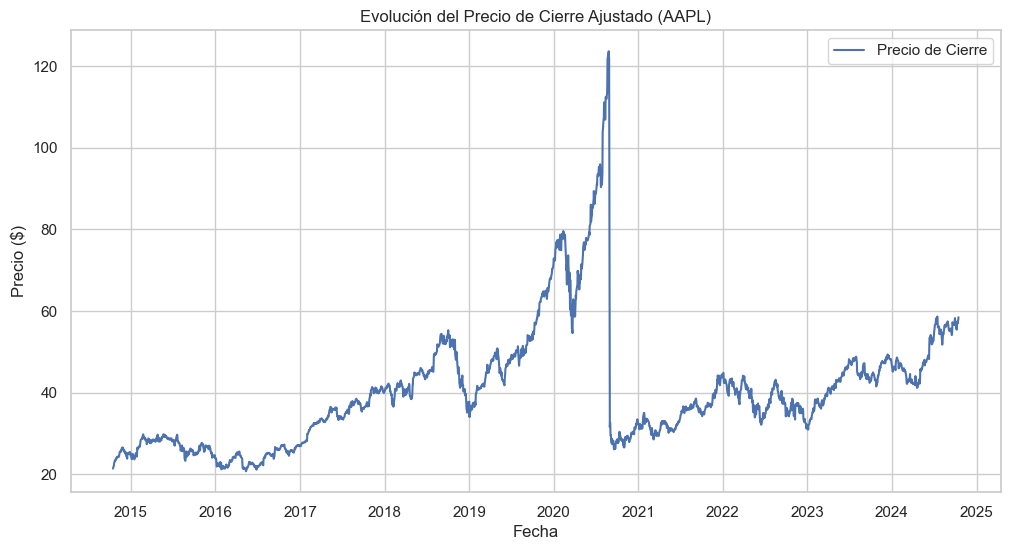

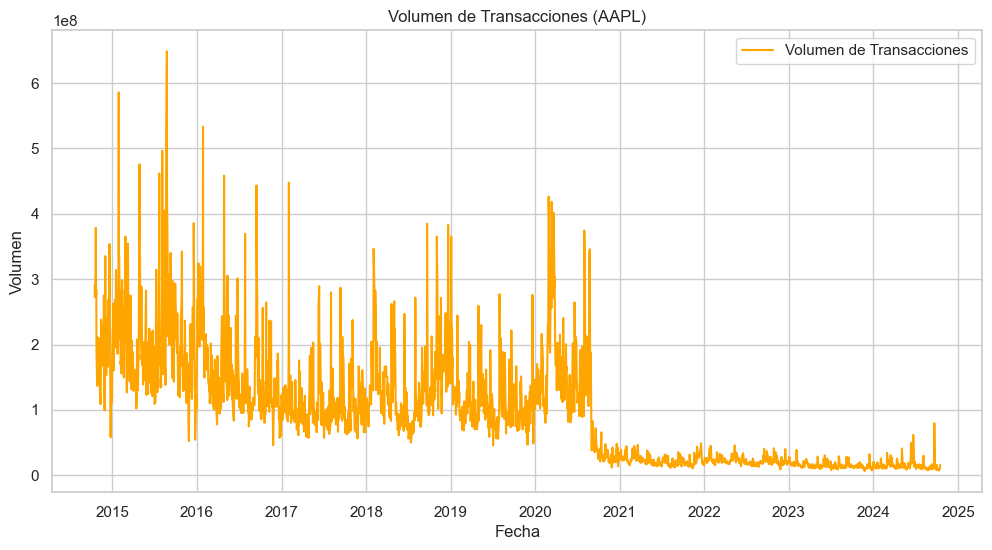

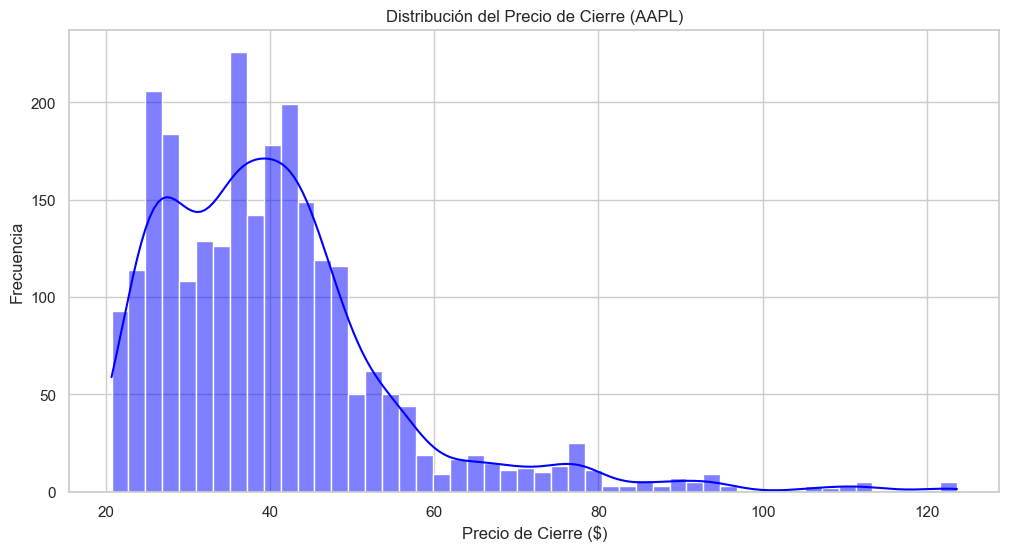

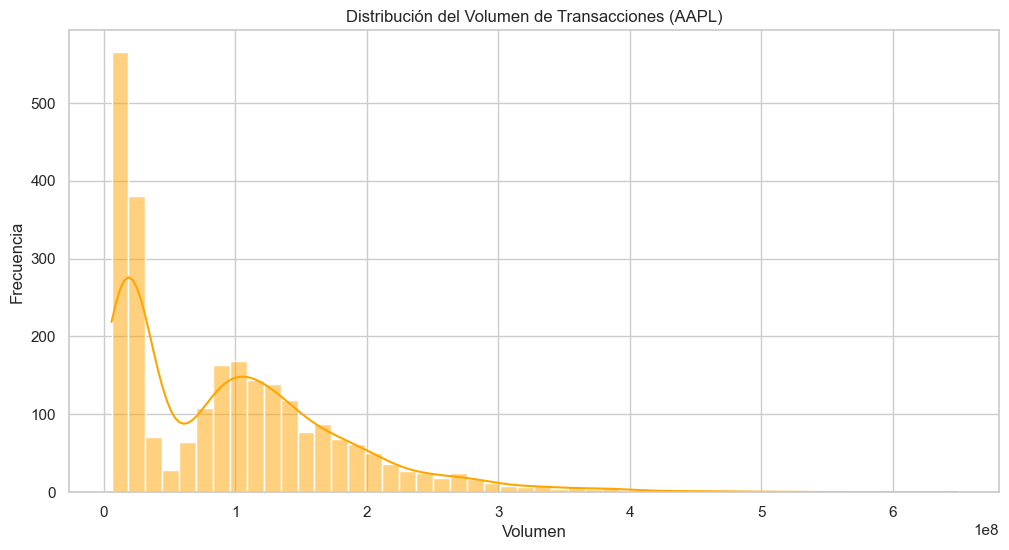

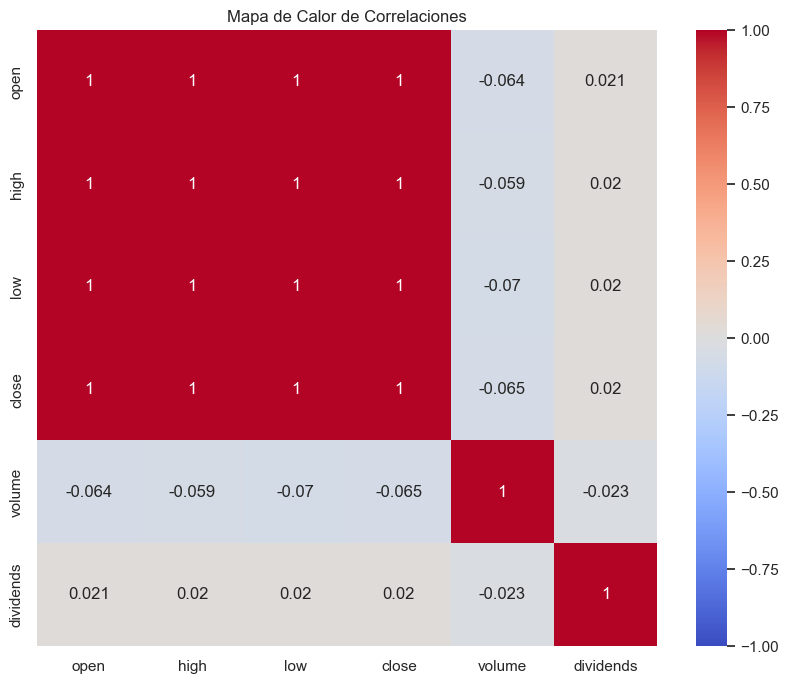

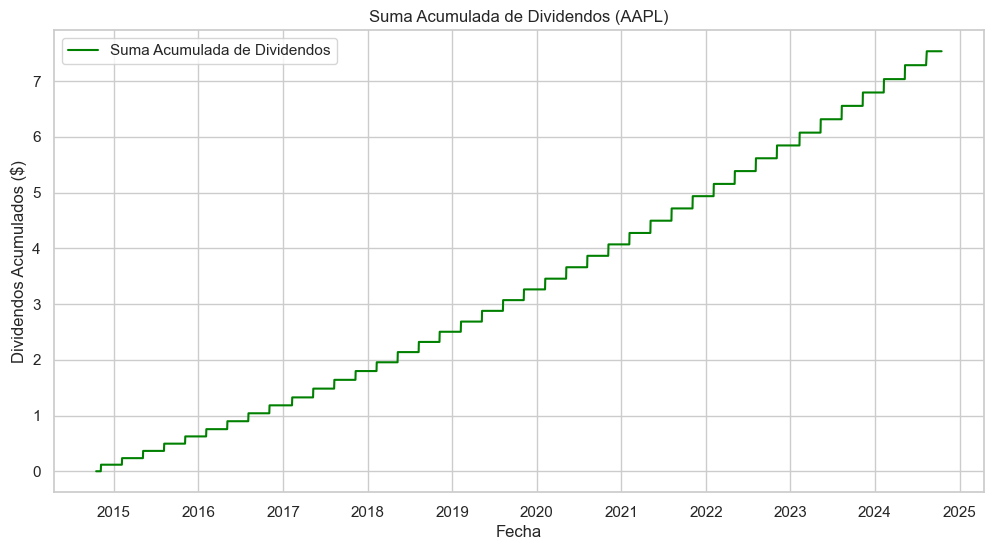

EDA completado.


In [7]:
#Probaremos los modelos tanto con los datos sin normalizar como con los datos normalizados y estandarizados, para comparar su rendimiento.
# Realizamos el EDA en los datos ajustados
perform_eda(apple_adjusted)

### normalized

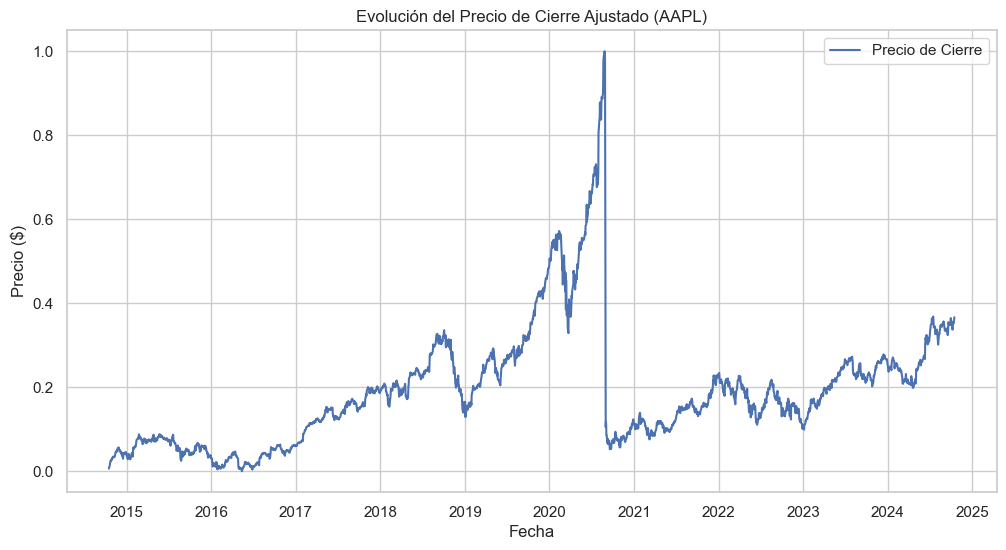

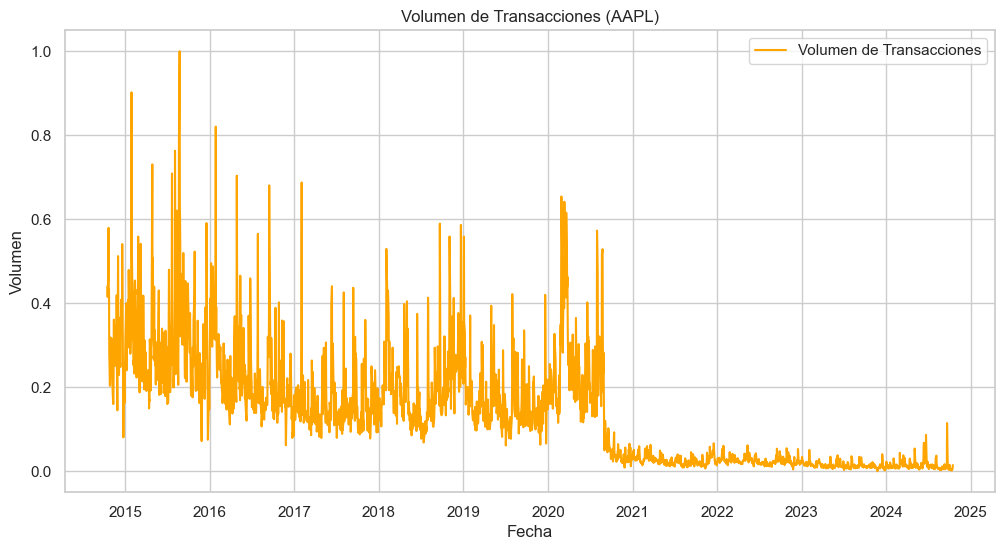

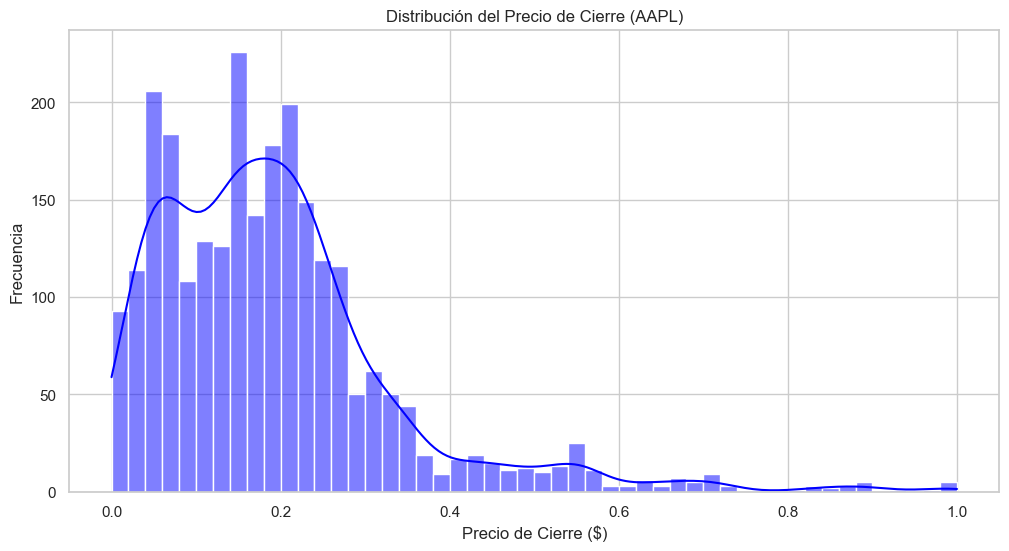

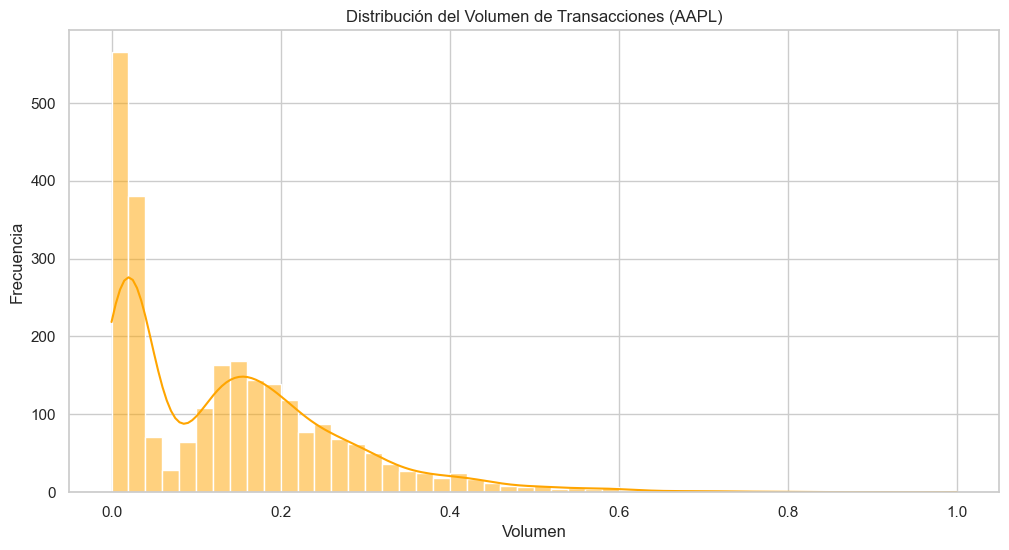

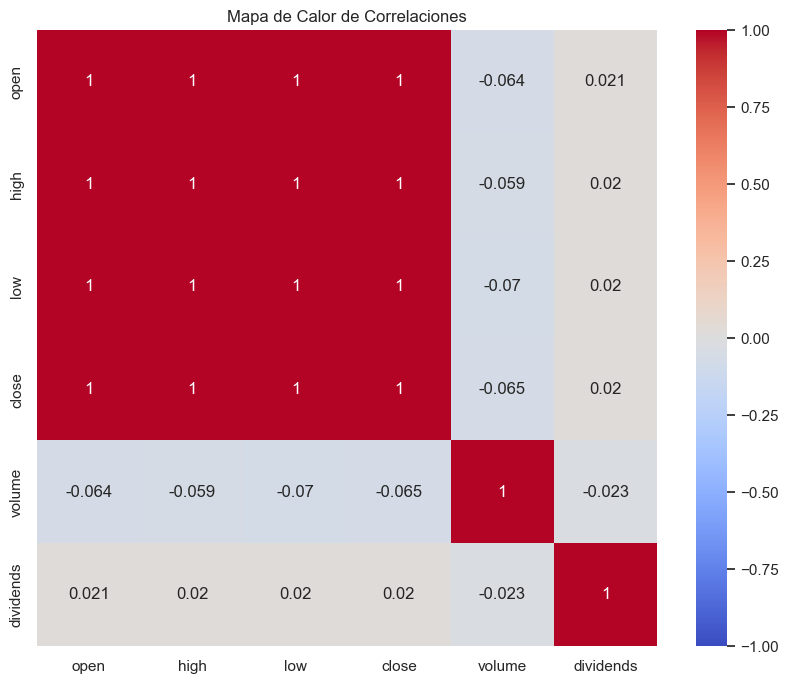

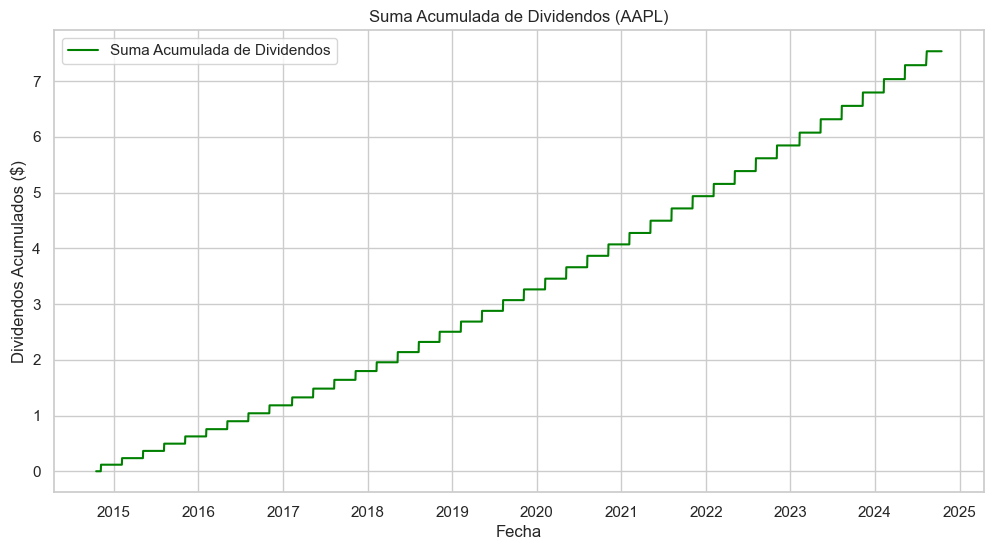

EDA completado.


In [8]:
perform_eda(apple_normalized)

### standardized

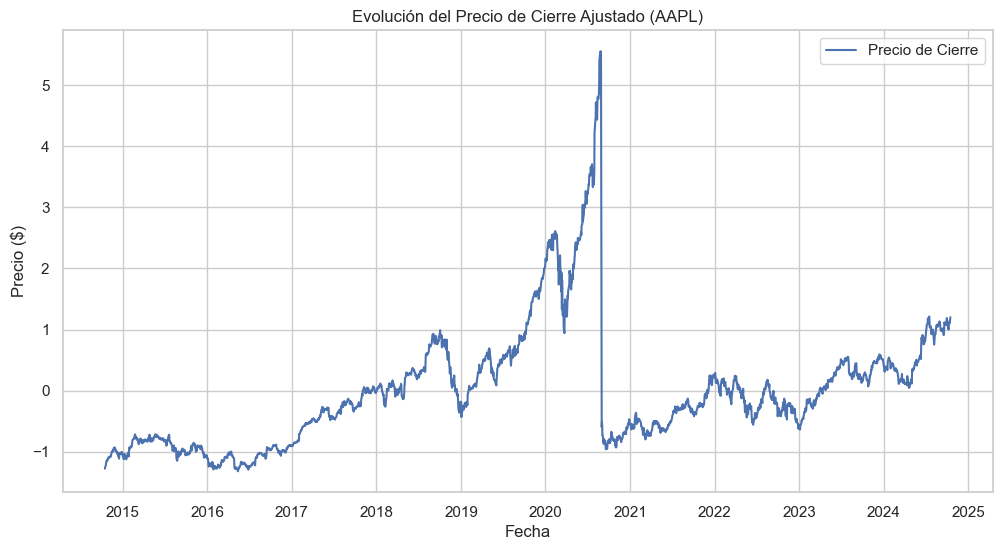

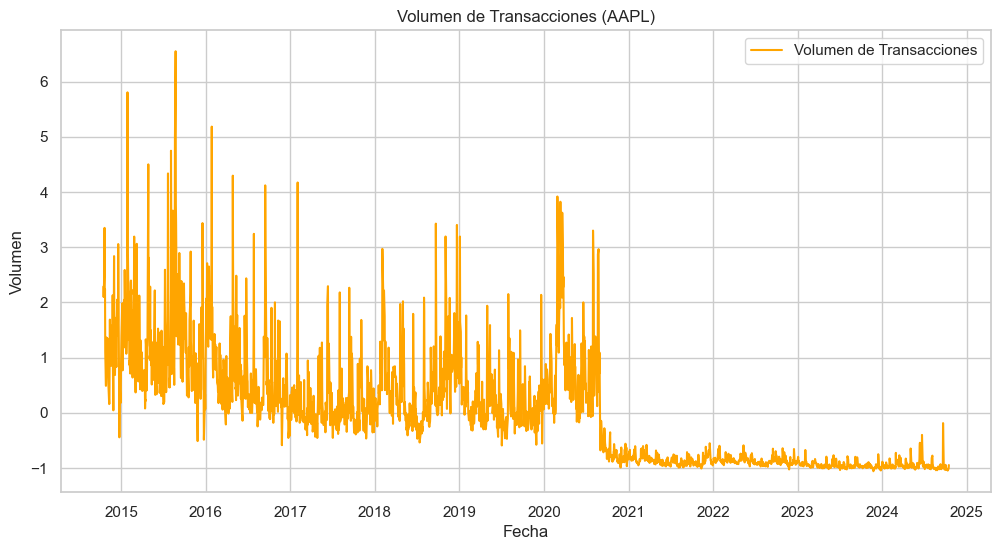

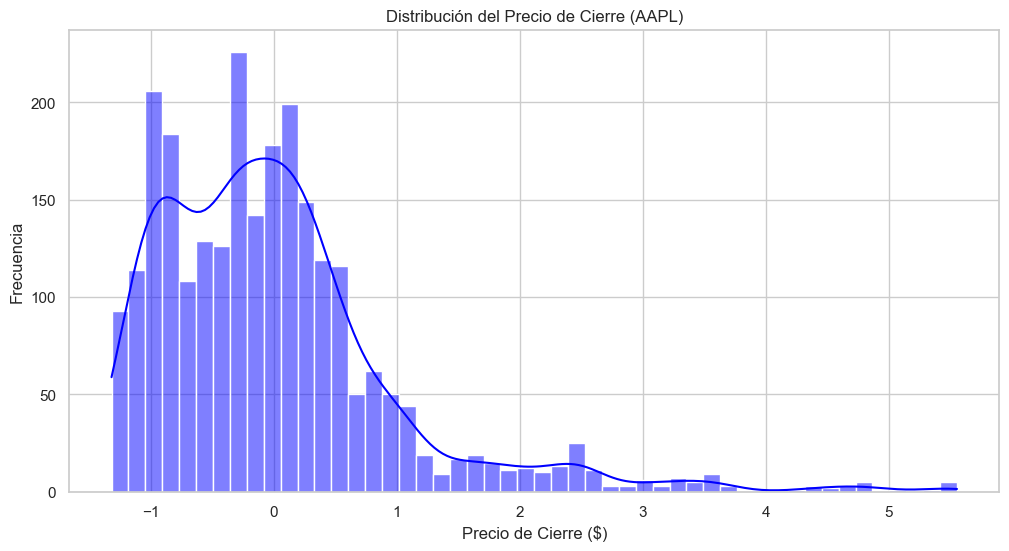

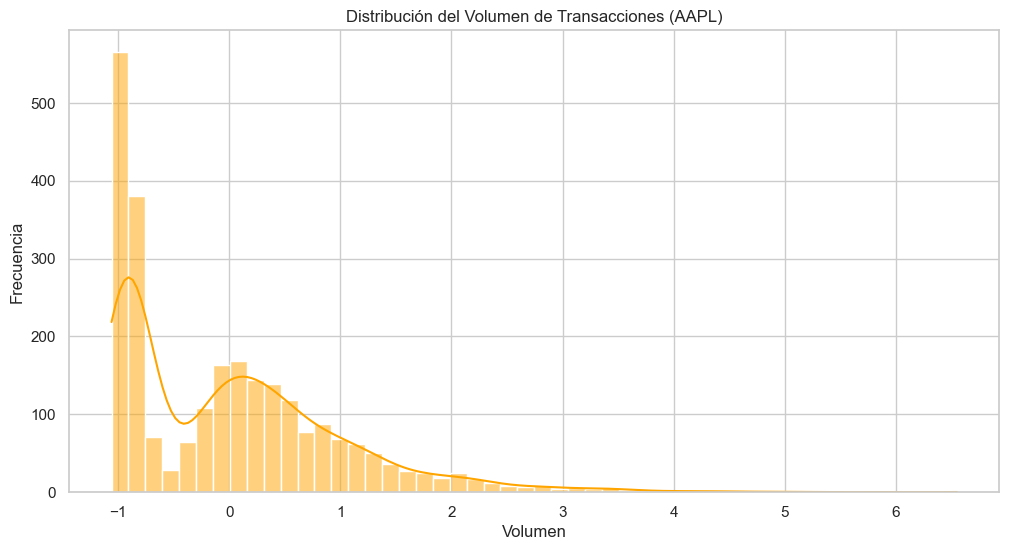

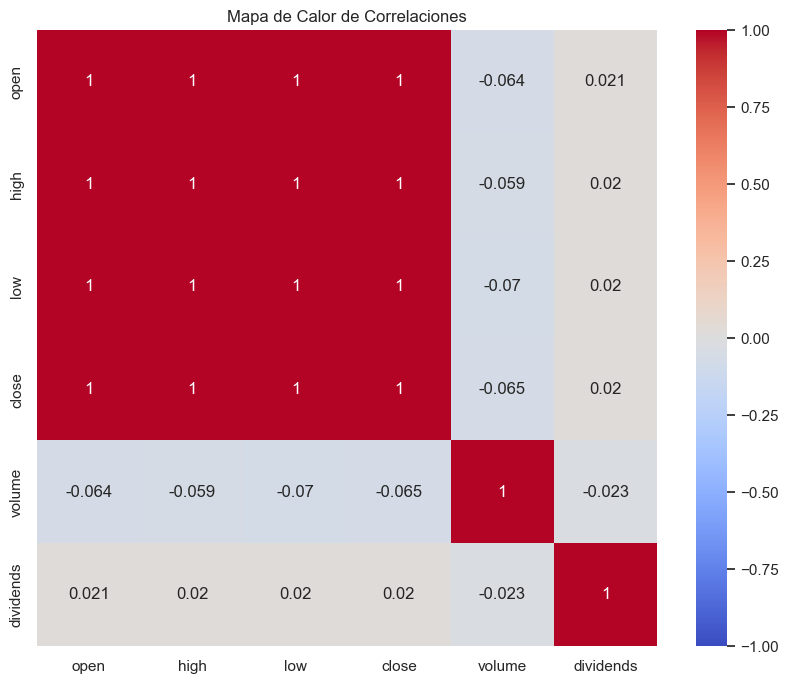

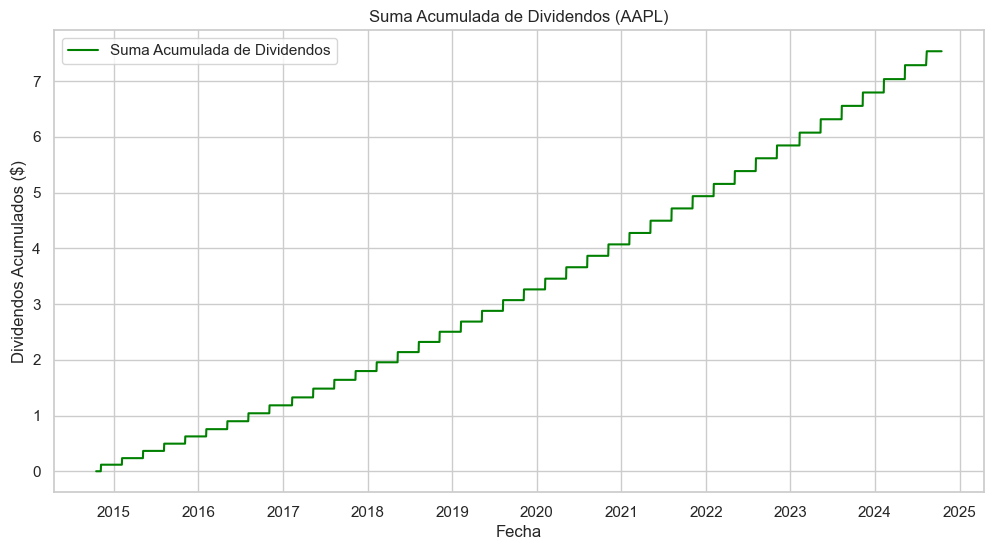

EDA completado.


In [9]:
perform_eda(apple_standardized)

# Modelos Entrenamientos comparativas

### Random Forest

In [10]:
def train_validation_split(df, train_size=0.8):
    train_index = int(len(df) * train_size)
    train_data = df.iloc[:train_index]
    validation_data = df.iloc[train_index:]
    return train_data, validation_data

# Dividir los datos en entrenamiento (2010-2021) y validación (2022-2023)
train_adjusted, validation_adjusted = train_validation_split(apple_adjusted)
train_normalized, validation_normalized = train_validation_split(apple_normalized)
train_standardized, validation_standardized = train_validation_split(apple_standardized)

# Después de esta división, ya puedes ejecutar Random Forest.


In [11]:
# Definir las características (features) y el objetivo (target)
features = ['open', 'high', 'low', 'volume']  # Características (variables predictoras)
target = 'close'  # Objetivo (precio de cierre que queremos predecir)
# Entrenamos y evaluamos el modelo Random Forest en los tres conjuntos de datos
print("Random Forest - Datos Sin Escalar:")
model_rf_adjusted, y_pred_rf_adjusted, val_mae_rf_adjusted, val_rmse_rf_adjusted, r2_rf_adjusted = train_random_forest_model(
    train_adjusted, validation_adjusted, features, target)
print(f"MAE en validación: {val_mae_rf_adjusted}, RMSE en validación: {val_rmse_rf_adjusted}, R² en validación: {r2_rf_adjusted}")

print("\nRandom Forest - Datos Normalizados:")
model_rf_normalized, y_pred_rf_normalized, val_mae_rf_normalized, val_rmse_rf_normalized, r2_rf_normalized = train_random_forest_model(
    train_normalized, validation_normalized, features, target)
print(f"MAE en validación: {val_mae_rf_normalized}, RMSE en validación: {val_rmse_rf_normalized}, R² en validación: {r2_rf_normalized}")

print("\nRandom Forest - Datos Estandarizados:")
model_rf_standardized, y_pred_rf_standardized, val_mae_rf_standardized, val_rmse_rf_standardized, r2_rf_standardized = train_random_forest_model(
    train_standardized, validation_standardized, features, target)
print(f"MAE en validación: {val_mae_rf_standardized}, RMSE en validación: {val_rmse_rf_standardized}, R² en validación: {r2_rf_standardized}")


Random Forest - Datos Sin Escalar:
MAE en validación: 0.24547177261776412, RMSE en validación: 0.3305693522705494, R² en validación: 0.9974497804554094

Random Forest - Datos Normalizados:
MAE en validación: 0.0023838275185381857, RMSE en validación: 0.0032071534205600086, R² en validación: 0.9974571523960623

Random Forest - Datos Estandarizados:
MAE en validación: 0.01637366961482892, RMSE en validación: 0.022029093697697698, R² en validación: 0.9974644328901687


### Regresion lineal

In [12]:
# Importar la función desde functions.py
from functions import train_regression_model

# Entrenar y evaluar el modelo en los tres conjuntos de datos
print("Regresión Lineal - Datos Sin Escalar:")
model_adjusted, y_pred_adjusted, val_mae_adjusted, val_rmse_adjusted, r2_adjusted = train_regression_model(
    train_adjusted, validation_adjusted, features, target)
print(f"MAE en validación: {val_mae_adjusted}, RMSE en validación: {val_rmse_adjusted}, R² en validación: {r2_adjusted}")

print("\nRegresión Lineal - Datos Normalizados:")
model_normalized, y_pred_normalized, val_mae_normalized, val_rmse_normalized, r2_normalized = train_regression_model(
    train_normalized, validation_normalized, features, target)
print(f"MAE en validación: {val_mae_normalized}, RMSE en validación: {val_rmse_normalized}, R² en validación: {r2_normalized}")

print("\nRegresión Lineal - Datos Estandarizados:")
model_standardized, y_pred_standardized, val_mae_standardized, val_rmse_standardized, r2_standardized = train_regression_model(
    train_standardized, validation_standardized, features, target)
print(f"MAE en validación: {val_mae_standardized}, RMSE en validación: {val_rmse_standardized}, R² en validación: {r2_standardized}")


Regresión Lineal - Datos Sin Escalar:
MAE en validación: 0.18437153543899695, RMSE en validación: 0.23767695808921294, R² en validación: 0.998681662647304

Regresión Lineal - Datos Normalizados:
MAE en validación: 0.0017913466630875311, RMSE en validación: 0.002309260084390322, R² en validación: 0.9986816626409863

Regresión Lineal - Datos Estandarizados:
MAE en validación: 0.012321941573040836, RMSE en validación: 0.015884456327268936, R² en validación: 0.9986816626409863


### ARIMA/SARIMA ###

In [13]:

# Dividir los datos en entrenamiento y validación para ARIMA/SARIMA
train_arima, validation_arima = train_validation_split(apple_adjusted)
# Asegurarte de que el índice tenga una frecuencia diaria
train_arima.index = pd.date_range(start=train_arima.index[0], periods=len(train_arima), freq='B')
validation_arima.index = pd.date_range(start=validation_arima.index[0], periods=len(validation_arima), freq='B')

# Parámetros iniciales de ARIMA y SARIMA
arima_order = (5, 1, 0)  # (p, d, q)
sarima_order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) - s es el período estacional (12 para mensual)

# Entrenar y evaluar el modelo ARIMA
print("ARIMA - Datos Sin Escalar:")
arima_result, y_pred_arima, val_mae_arima, val_rmse_arima = train_arima_model(
    train_arima, validation_arima, target, arima_order)
print(f"MAE en validación: {val_mae_arima}, RMSE en validación: {val_rmse_arima}")

# Entrenar y evaluar el modelo SARIMA
print("\nSARIMA - Datos Sin Escalar:")
sarima_result, y_pred_sarima, val_mae_sarima, val_rmse_sarima = train_sarima_model(
    train_arima, validation_arima, target, sarima_order, seasonal_order)
print(f"MAE en validación: {val_mae_sarima}, RMSE en validación: {val_rmse_sarima}")

ARIMA - Datos Sin Escalar:
MAE en validación: 10.766924174147265, RMSE en validación: 12.477551502920617

SARIMA - Datos Sin Escalar:
MAE en validación: 9.00199208186472, RMSE en validación: 10.513672558880677


### Prueba modelo prophet

In [14]:
# %pip install ipywidgets --upgrade

In [15]:
# %pip install plotly


In [16]:
apple_adjusted.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits',
       'dividend_return'],
      dtype='object')

In [17]:

from prophet import Prophet


# Configurar Prophet para usar cmdstanpy como backend
model = Prophet(stan_backend='CMDSTANPY')

# Continuar con el entrenamiento
model.fit(apple_adjusted)


def prepare_data_with_date(df):
    # Convierte el índice en una columna
    df_with_date = df.reset_index()  # Convierte el índice en una columna
    df_with_date.rename(columns={'index': 'date'}, inplace=True)  # Renombrar la columna a 'date'
    return df_with_date

def train_prophet_model(df, target):
    # Preparar los datos para Prophet
    df_prophet = prepare_data_with_date(df)
    
    # Imprimir las columnas para verificar que 'date' está presente
    print(df_prophet.columns)
    
    # Usar la columna 'date' y la columna target ('close')
    df_prophet = df_prophet[['Date', target]]
    df_prophet.columns = ['ds', 'y']  # Prophet requiere 'ds' para fechas y 'y' para valores
    
    # Crear y entrenar el modelo Prophet
    model = Prophet()
    model.fit(df_prophet)
    
    # Crear predicciones hasta el 2030
    future = model.make_future_dataframe(periods=365*6)  # Predicción para los próximos 6 años (hasta 2030)
    forecast = model.predict(future)
    
    return model, forecast

# Llamar a la función con los datos ajustados
prophet_model, forecast = train_prophet_model(apple_adjusted, target='close')



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 9: invalid continuation byte

In [30]:
# %pip install pystan==2.19.1.1 --only-binary=:all:


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pystan==2.19.1.1 (from versions: 3.0.0b1, 3.0.0b2, 3.0.0b3, 3.0.0b4, 3.0.0b5, 3.0.0b6, 3.0.0b7, 3.0.0b8, 3.0.0rc1, 3.0.0, 3.0.1, 3.0.2, 3.1.0, 3.1.1, 3.2.0, 3.3.0, 3.4.0, 3.5.0, 3.6.0, 3.7.0, 3.8.0, 3.9.0, 3.9.1, 3.10.0)
ERROR: No matching distribution found for pystan==2.19.1.1


In [31]:
# %pip install cmdstanpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
#%pip install pystan==2.19.1.1


  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [21261 lines of output]
      C:\Users\danny\AppData\Local\Temp\pip-install-mbded2vd\pystan_3d774c0432814d56b3c8cb9d6eb76698\setup.py:235: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command import install
      Compiling pystan/_api.pyx because it changed.
      Compiling pystan/_chains.pyx because it changed.
      Compiling pystan/_misc.pyx because it changed.
      [1/3] Cythonizing pystan/_api.pyx
      [2/3] Cythonizing pystan/_chains

In [28]:
#%pip install Cython



   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 54.8 MB/s eta 0:00:00


In [26]:
#%pip install pystan==2.19.1.1


     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ----------------------- ---------------- 9.7/16.2 MB 46.5 MB/s eta 0:00:01
     -------------------------------- ------ 13.6/16.2 MB 38.9 MB/s eta 0:00:01
     --------------------------------------- 16.2/16.2 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\danny\AppData\Local\Temp\pip-install-xi2gnrvq\pystan_8d8e8eadd7554697b5b1caa4affd2f8a\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [25]:
#%pip install cmdstanpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
# %pip install --upgrade jupyter



  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab-4.2.5-py3-none-any.whl.metadata (16 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached nbformat-5.10.4-py3-none-any

In [4]:

#%pip install --upgrade ipywidgets

Note: you may need to restart the kernel to use updated packages.


### REdes neuronales

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'apple_adjusted' is your DataFrame with stock prices and 'close' is the target column
def prepare_lstm_data(df, target, time_steps=60):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[[target]])

    # Prepare data for LSTM (features: time_steps previous prices, target: next price)
    X, y = [], []
    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i - time_steps:i, 0])
        y.append(scaled_data[i, 0])

    # Reshape the data into (samples, time_steps, features)
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Prepare LSTM input
time_steps = 60
X_train, y_train, scaler = prepare_lstm_data(apple_adjusted, target='close', time_steps=time_steps)

# Build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(input_shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))  # Output layer for price prediction
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
model = build_lstm_model(X_train.shape)
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict future values
# To predict future stock prices, you can generate predictions using the trained model.


Epoch 1/10


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0152
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0013
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 8.8362e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.5361e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.6462e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0013
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.9134e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.1467e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.5941e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4326e-04


### 2. Regresor de bosque aleatorio

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data for Random Forest (with lag features)
def create_lagged_features(df, target, lags=3):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[target].shift(lag)
    df.dropna(inplace=True)
    return df

# Create lagged features for 'close'
df_lagged = create_lagged_features(apple_adjusted, 'close', lags=3)

# Train-test split
X = df_lagged.drop(['close'], axis=1)
y = df_lagged['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 0.10885747657402735


### Regresor XGBoost

In [21]:
# %pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear la función para generar características con retardos
def create_lagged_features(df, target, lags=3):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[target].shift(lag)
    df.dropna(inplace=True)
    return df

# Aplicar la función de retardos en 'close'
df_lagged = create_lagged_features(apple_adjusted, 'close', lags=3)

# Dividir en conjunto de entrenamiento y prueba
X = df_lagged.drop(['close'], axis=1)
y = df_lagged['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse_xgb}")



XGBoost MSE: 0.20501185341857328


### 4. ARIMA (Media móvil autorregresiva integrada)

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare the data (just using 'close' column)
train_data, test_data = apple_adjusted['close'][:-100], apple_adjusted['close'][-100:]

# Fit ARIMA model
model_arima = ARIMA(train_data, order=(5, 1, 0))
arima_fit = model_arima.fit()

# Make predictions
y_pred_arima = arima_fit.forecast(steps=len(test_data))
mse_arima = mean_squared_error(test_data, y_pred_arima)
print(f"ARIMA MSE: {mse_arima}")


ARIMA MSE: 56.418724165371295


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported 

# Preuba uno, download and cleaning

In [ ]:
# Descargar los datos del oro (GOLD)
apple = yf.Ticker("AAPL")

# Obtener datos históricos (últimos 5 años)
apple_data = apple.history(period="10y")

# Mostrar los primeros 5 registros
apple_data.head(-5)

In [15]:
apple_data =  normalizar_nombres_columnas(apple_data)

In [ ]:
apple_data.columns

In [ ]:
#Comprobamos nulos
apple_data.isnull().sum()

In [ ]:
# Comprobamos duplicados
apple_data.duplicated().sum()

In [ ]:
apple_data.dtypes

In [ ]:
apple_data.describe

## intendo de rescatar mas datos de la compañia a travez de la API de yahoo

In [ ]:
per = apple.info['trailingPE']
print(f"El PER de Apple es: {per}")

market_cap = apple.info['marketCap']
print(f"La capitalización bursátil de Apple es: {market_cap}")



In [ ]:
import yfinance as yf

# Obtener datos de Apple
aapl = yf.Ticker("AAPL")

# Información básica
print(apple.info)

# PER
print("PER:", apple.info['trailingPE'])

# Capitalización bursátil
print("Market Cap:", apple.info['marketCap'])

# Precio actual
print("Precio actual:", aapl.info['regularMarketPrice'])

# 52 semanas máximos y mínimos
print("52 semanas máximo:", apple.info['fiftyTwoWeekHigh'])
print("52 semanas mínimo:", apple.info['fiftyTwoWeekLow'])

## Youtube video, en el cual realiza machine learning sobre el sp500

In [ ]:
apple_data.index


In [ ]:
apple_data.plot.line(y="close", use_index=True)

In [40]:
del apple_data["dividends"]
del apple_data["stock_splits"]
# las eliminamos porque no las vamos a usar

In [41]:
apple_data["tomorrow"]=  apple_data["close"].shift(-1)

In [ ]:
apple_data

In [43]:
apple_data["target"] = (apple_data["tomorrow"] > apple_data["close"]).astype(int)

In [ ]:
apple_data

In [ ]:
apple_data.columns

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Separamos los datos en entrenamiento y prueba
train = apple_data.iloc[:-100]
test= apple_data.iloc[-100:]
predictors = ["close", "volume", "open", "high", "low"]
model.fit(train[predictors], train["target"])

In [47]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [48]:
preds  = pd.Series(preds, index= test.index)

In [ ]:
precision_score(test["target"], preds)

In [50]:
combined = pd.concat([test["target"], preds], axis=1)

In [ ]:
combined.plot()

In [52]:
##backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index= test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [53]:
def backtest(data, model, predictors, start= 2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [54]:
predictions = backtest(apple_data, model, predictors)

In [ ]:
predictions["predictions"].value_counts()

In [ ]:
precision_score(predictions["target"]), predictions["predictions"]

In [ ]:
predictions["target"].value_counts() /predictions.shape[0]

In [33]:
horizons = [2,5,60,250,1000]

new_predictions =[]

for horizon in horizons:

    rolling_averages = apple_data.rolling(horizon).mean()

    ratio_column = f"Close_ratio_{horizon}"
    apple_data[ratio_column] = apple_data["close"] / rolling_averages["close"]

    trend_column = f"Trend_{horizon}"
    apple_data[trend_column] = apple_data.shift(1).rolling(horizon).sum()["target"]

    new_predictions += [ratio_column, trend_column]

In [ ]:
apple_data = apple_data.dropna()
apple_data

In [36]:
# improving model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [39]:
##backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index= test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(apple_data, model, new_predictions)

In [ ]:
predictions["predictions"].value_counts()

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

# Sugerencia medias moviles estrategia de gestión de cartera

In [ ]:
import yfinance as yf

# Obtener datos históricos de Apple (AAPL)
aapl = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

# Mostrar los primeros 5 registros
print(aapl.head())

In [ ]:
# Calcular medias móviles simple y exponencial
aapl['SMA50'] = aapl['Close'].rolling(window=50).mean()
aapl['EMA20'] = aapl['Close'].ewm(span=20, adjust=False).mean()
# Calcular bandas de Bollinger
aapl['BB_upper'] = aapl['EMA20'] + 2 * aapl['Close'].rolling(window=20).std()
aapl['BB_lower'] = aapl['EMA20'] - 2 * aapl['Close'].rolling(window=20).std()

# Crear señales de compra y venta
aapl['Buy_Signal'] = np.where((aapl['EMA20'] > aapl['SMA50']) & (aapl['Close'] < aapl['BB_lower']), 1, 0)
aapl['Sell_Signal'] = np.where((aapl['EMA20'] < aapl['SMA50']) & (aapl['Close'] > aapl['BB_upper']), 1, 0)

# Visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(aapl['Close'], label='Precio de Cierre')
plt.plot(aapl['SMA50'], label='SMA50')
plt.plot(aapl['EMA20'], label='EMA20')
plt.fill_between(aapl.index, aapl['BB_upper'], aapl['BB_lower'], alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Inicializar variables para el backtesting
cash = 100000  # Capital inicial
shares = 0
in_position = False

# Parámetros adicionales
comision = 0.001  # Comisión por operación (0.1%)
deslizamiento = 0.005  # Deslizamiento del 0.5%
tasa_impuestos = 0.25  # Tasa de impuestos sobre ganancias (25%)

# Inicializar variables para el backtesting
cash = 100000
shares = 0
in_position = False
portfolio_value = [cash]

# Simular la estrategia
for i in range(1, len(aapl)):
    # Ajustar el precio por el deslizamiento
    adjusted_price = aapl['Close'].iloc[i] * (1 + np.random.uniform(-deslizamiento, deslizamiento))

    if aapl['Buy_Signal'].iloc[i] == 1 and not in_position:
        shares = (cash - cash * comision) // adjusted_price
        cash -= shares * adjusted_price
        in_position = True
    elif aapl['Sell_Signal'].iloc[i] == 1 and in_position:
        proceeds = shares * adjusted_price * (1 - comision)
        taxes = (proceeds - cash) * tasa_impuestos
        cash = proceeds - taxes
        shares = 0
        in_position = False

    # Calcular el valor de la cartera
    portfolio_value.append(cash + shares * aapl['Close'].iloc[i])

# Convertir la lista de valores de la cartera en un DataFrame
portfolio = pd.DataFrame(portfolio_value, index=aapl.index, columns=['Portfolio Value'])

# Calcular métricas de evaluación
returns = portfolio.pct_change()
annualized_return = (1 + returns.mean())**252 - 1
max_drawdown = (portfolio.cummax() - portfolio) / portfolio.cummax().shift().fillna(method='ffill')
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(portfolio)
plt.title('Evolución del Valor de la Cartera')
plt.ylabel('Valor')
plt.xlabel('Fecha')
plt.show()

print("Rentabilidad anualizada:", annualized_return)
print("Máximo drawdown:", max_drawdown.max())
print("Ratio de Sharpe:", sharpe_ratio)